In [ ]:
#S.JOE MATHEW

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer

In [ ]:
house_train = pd.read_csv('house_train.csv')
house_test = pd.read_csv('house_test.csv')
saleprice = pd.DataFrame(house_train.iloc[:,-1])

In [ ]:
house = pd.concat([house_train.drop(columns=['SalePrice']),house_test])

In [ ]:
house.shape

(2919, 80)

In [ ]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [ ]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [ ]:
#house_train = house_train.drop(['Street','Alley','Utilities','RoofMatl','Exterior1st','MasVnrType','MasVnrArea',
         #                      'ExterQual','ExterCond','LowQualFinSF','FireplaceQu','PoolQC'],axis=1)

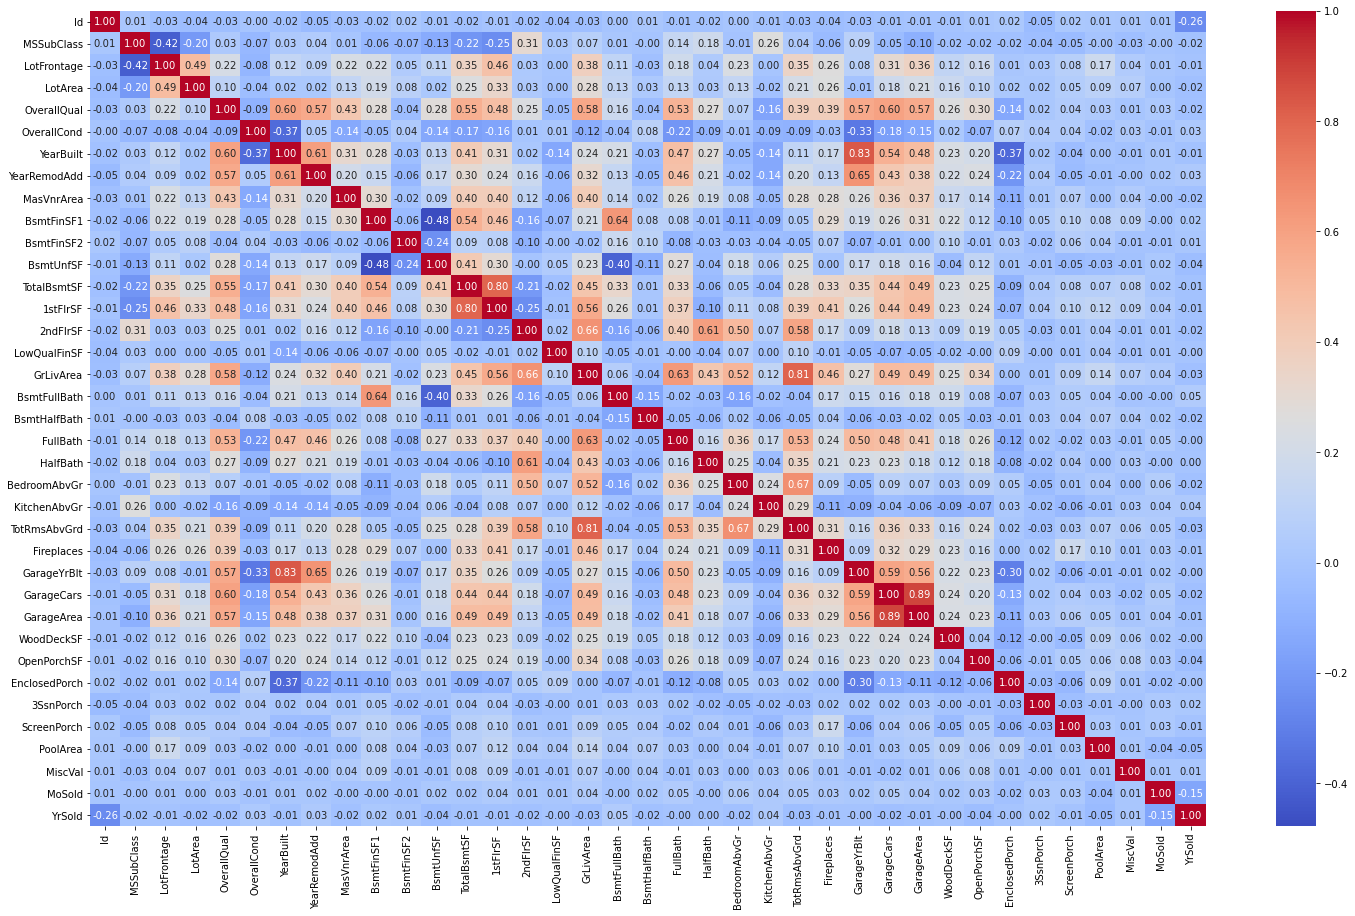

In [ ]:
f,ax = plt.subplots(figsize=(25,15))
sns.heatmap(house.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

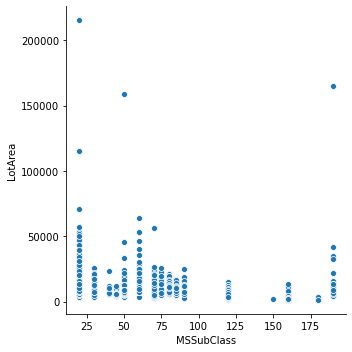

In [ ]:
sns.relplot(x='MSSubClass',y='LotArea',data=house)

In [ ]:
null_columns=house.columns[house.isnull().any()]

house[null_columns].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [ ]:
# to find the null values datatypes
print(house[house.isnull().any(axis=1)][null_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [ ]:
all_data = house

In [ ]:
# Now we will fill the missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# We Group by neighborhood then filling in the missing values by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] =all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
# Now we will fill the missing values
all_data1["PoolQC"] = all_data1["PoolQC"].fillna("None")

all_data1["MiscFeature"] = all_data1["MiscFeature"].fillna("None")

all_data1["Alley"] = all_data1["Alley"].fillna("None")

all_data1["Fence"] = all_data1["Fence"].fillna("None")

all_data1["FireplaceQu"] = all_data1["FireplaceQu"].fillna("None")

# We Group by neighborhood then filling in the missing values by the median LotFrontage of all the neighborhood
all_data1["LotFrontage"] = all_data1.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data1[col] =all_data1[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data1[col] = all_data1[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data1[col] = all_data1[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data1[col] = all_data1[col].fillna('None')
    
all_data1["MasVnrType"] = all_data1["MasVnrType"].fillna("None")
all_data1["MasVnrArea"] = all_data1["MasVnrArea"].fillna(0)

all_data1['MSZoning'] = all_data1['MSZoning'].fillna(all_data1['MSZoning'].mode()[0])

all_data1["Functional"] = all_data1["Functional"].fillna("Typ")

all_data1['Electrical'] = all_data1['Electrical'].fillna(all_data1['Electrical'].mode()[0])

all_data1['KitchenQual'] = all_data1['KitchenQual'].fillna(all_data1['KitchenQual'].mode()[0])

all_data1['Exterior1st'] = all_data1['Exterior1st'].fillna(all_data1['Exterior1st'].mode()[0])
all_data1['Exterior2nd'] = all_data1['Exterior2nd'].fillna(all_data1['Exterior2nd'].mode()[0])

all_data1['SaleType'] = all_data1['SaleType'].fillna(all_data1['SaleType'].mode()[0])

all_data1['MSSubClass'] = all_data1['MSSubClass'].fillna("None")

In [ ]:
all_data.shape

(2919, 80)

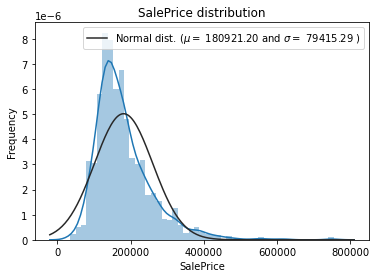

In [ ]:
#saleprice = pd.DataFrame(house_train.iloc[:,-1])



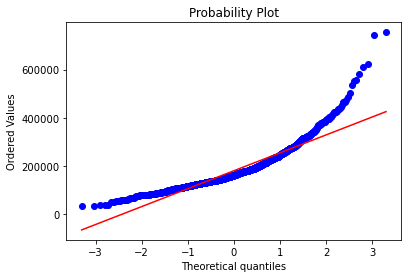

In [ ]:
q_plot = stats.probplot(saleprice['SalePrice'], plot=plt)

In [ ]:
# saleprice = np.log1p(saleprice)
# y=saleprice
# y.head()
saleprice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
saleprice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [ ]:

all_data=all_data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageArea','PoolQC', 'MiscFeature', 'Fence','MiscVal','PoolArea','Utilities'], axis=1)

In [ ]:
all_data = pd.get_dummies(all_data)
# again splitting X_test and X_train
houses_test=all_data.iloc[1460:,:]
houses_train=all_data.iloc[:1460,:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(houses_train.drop(['Id'],axis=1), 
                                                    saleprice, test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=25, random_state=0)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

80.56790011271796 %


In [ ]:
id = houses_test['Id']
predictions =regressor.predict(houses_test.drop('Id', axis=1))
result = pd.DataFrame({ 'Id' : id, 'SalePrice': predictions })
result.head()


,Id,SalePrice
0,1461,128134.00
1,1462,158682.00
2,1463,168348.00
3,1464,184745.28
4,1465,197162.24


In [ ]:
result.head(20)

,Id,SalePrice
0,1461,128134.00
1,1462,158682.00
2,1463,168348.00
3,1464,184745.28
4,1465,197162.24
5,1466,186112.00
6,1467,166903.40
7,1468,176842.88
8,1469,183607.80
9,1470,121215.04


In [ ]:
result.to_csv('house-pred.csv', index = False)